#Object Detection using Haar Cascade Classifier
Object Detection using Haar feature-based cascade classifiers is an effective object detection method proposed by Paul Viola and Michael Jones in their paper, "Rapid Object Detection using a Boosted Cascade of Simple Features" in 2001. It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images.

Here we will work with face detection. Initially, the algorithm needs a lot of positive images (images of faces) and negative images (images without faces) to train the classifier. Then we need to extract features from it. For this, Haar features shown in the below image are used. They are just like our convolutional kernel. Each feature is a single value obtained by subtracting sum of pixels under the white rectangle from sum of pixels under the black rectangle.

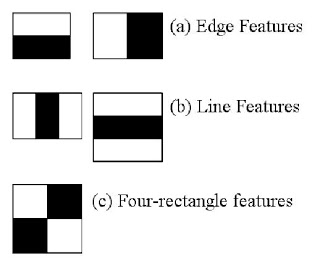

Now, all possible sizes and locations of each kernel are used to calculate lots of features. (Just imagine how much computation it needs? Even a 24x24 window results over 160000 features). For each feature calculation, we need to find the sum of the pixels under white and black rectangles. To solve this, they introduced the integral image. However large your image, it reduces the calculations for a given pixel to an operation involving just four pixels. Nice, isn't it? It makes things super-fast.

But among all these features we calculated, most of them are irrelevant. For example, consider the image below. The top row shows two good features. The first feature selected seems to focus on the property that the region of the eyes is often darker than the region of the nose and cheeks. The second feature selected relies on the property that the eyes are darker than the bridge of the nose. But the same windows applied to cheeks or any other place is irrelevant. So how do we select the best features out of 160000+ features? It is achieved by Adaboost.

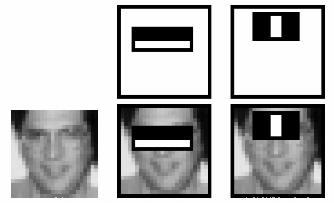

For this, we apply each and every feature on all the training images. For each feature, it finds the best threshold which will classify the faces to positive and negative. Obviously, there will be errors or misclassifications. We select the features with minimum error rate, which means they are the features that most accurately classify the face and non-face images. (The process is not as simple as this. Each image is given an equal weight in the beginning. After each classification, weights of misclassified images are increased. Then the same process is done. New error rates are calculated. Also new weights. The process is continued until the required accuracy or error rate is achieved or the required number of features are found).

The final classifier is a weighted sum of these weak classifiers. It is called weak because it alone can't classify the image, but together with others forms a strong classifier. The paper says even 200 features provide detection with 95% accuracy. Their final setup had around 6000 features. (Imagine a reduction from 160000+ features to 6000 features. That is a big gain).

So now you take an image. Take each 24x24 window. Apply 6000 features to it. Check if it is face or not. Wow.. Isn't it a little inefficient and time consuming? Yes, it is. The authors have a good solution for that.

In an image, most of the image is non-face region. So it is a better idea to have a simple method to check if a window is not a face region. If it is not, discard it in a single shot, and don't process it again. Instead, focus on regions where there can be a face. This way, we spend more time checking possible face regions.

For this they introduced the concept of Cascade of Classifiers. Instead of applying all 6000 features on a window, the features are grouped into different stages of classifiers and applied one-by-one. (Normally the first few stages will contain very many fewer features). If a window fails the first stage, discard it. We don't consider the remaining features on it. If it passes, apply the second stage of features and continue the process. The window which passes all stages is a face region. How is that plan!

The authors' detector had 6000+ features with 38 stages with 1, 10, 25, 25 and 50 features in the first five stages. (The two features in the above image are actually obtained as the best two features from Adaboost). According to the authors, on average 10 features out of 6000+ are evaluated per sub-window.

[Paul Viola and Michael J. Jones. Robust real-time face detection. International Journal of Computer Vision, 57(2):137–154, 2004.](https://docs.opencv.org/3.4/d0/de3/citelist.html#CITEREF_Viola04)

[Rainer Lienhart and Jochen Maydt. An extended set of haar-like features for rapid object detection. In Image Processing. 2002. Proceedings. 2002 International Conference on, volume 1, pages I–900. IEEE, 2002.](https://docs.opencv.org/3.4/d0/de3/citelist.html#CITEREF_Lienhart02)

[Cascade Classifier, OpenCV Documentation](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html)

In [14]:
import cv2
import requests
import numpy as np
from google.colab.patches import cv2_imshow

##Retrieve and convert image

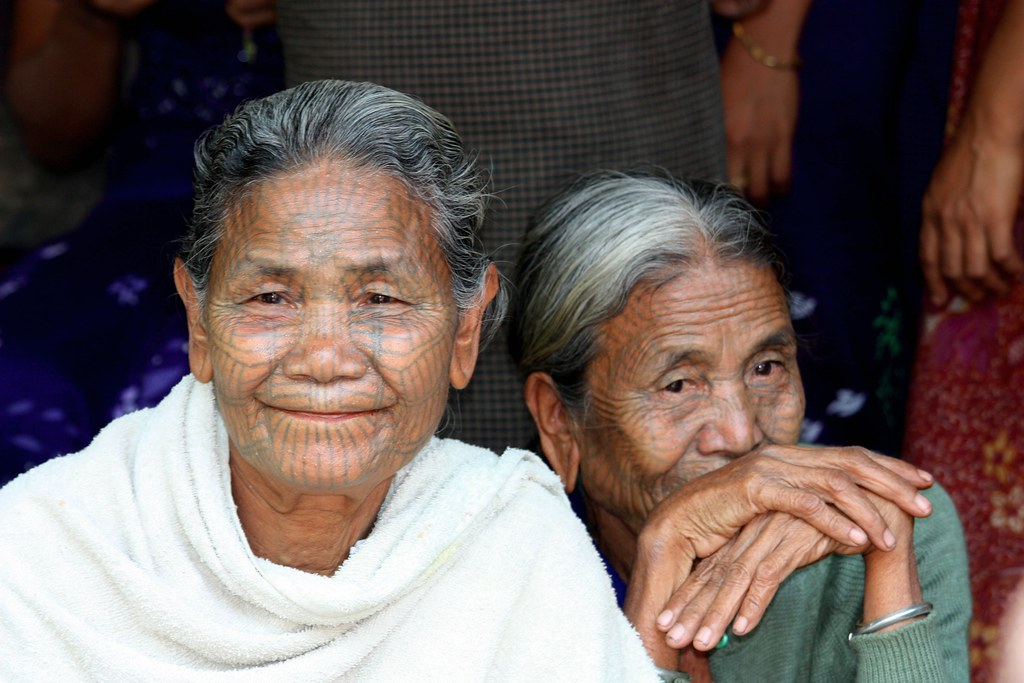

In [15]:
url = "https://live.staticflickr.com/8014/7374973958_ff0ffd3432_b.jpg"
r = requests.get(url)
arr = np.asarray(bytearray(r.content), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
cv2_imshow(img)

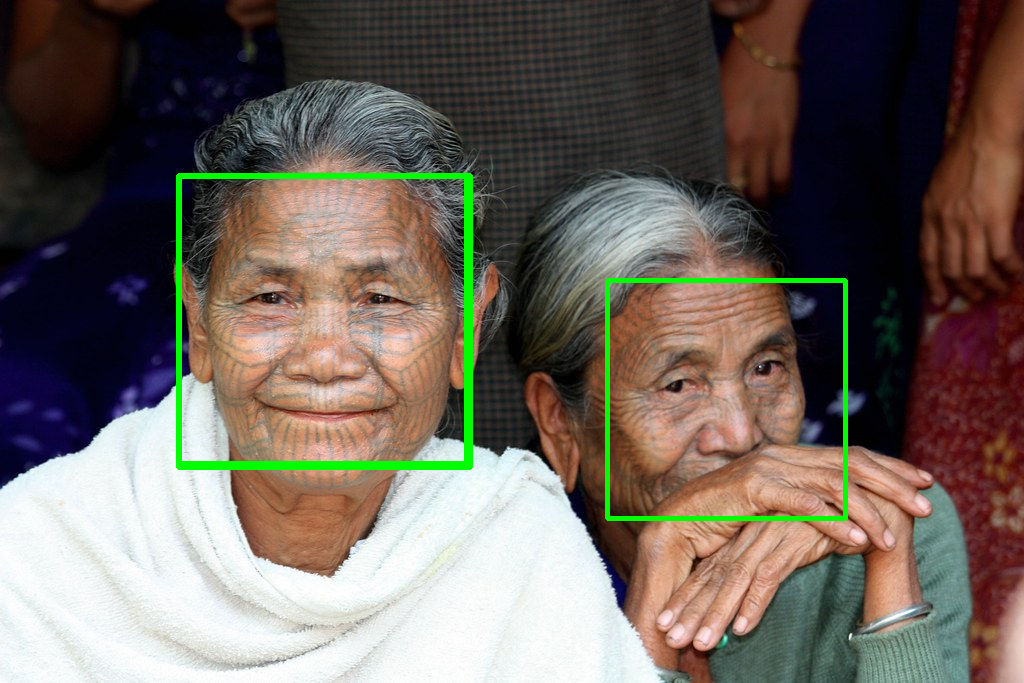

In [17]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(imgGray, 1.3, 5)
for (x, y, w, h) in faces:
    img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255,   0), 3)

cv2_imshow(img)